In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
titanic = pd.read_csv('train.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Apple SD Gothic Neo' # 한글 폰트 설정 (맥)
plt.rcParams['axes.unicode_minus'] = False # '-' 기호 깨짐 방지

In [3]:
titanic = titanic.drop(['PassengerId','Ticket','Cabin'],axis=1)
#예측 결과에 영향을 주지 않는 것 제외

survive = titanic[['Survived']]
nothing = titanic.copy()
del nothing['Survived']

In [4]:
survive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [5]:
nothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


<Axes: xlabel='Sex'>

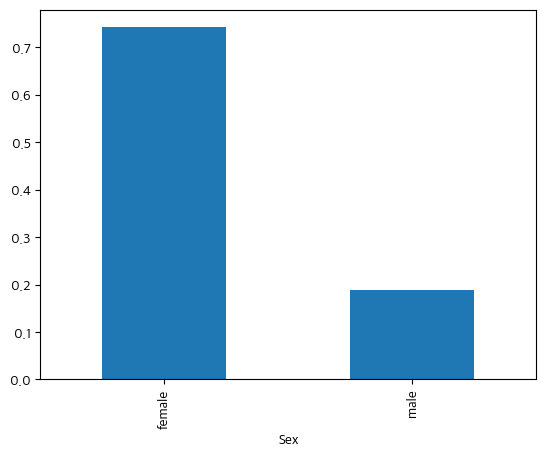

In [6]:
#성별 - 생존율 
titanic.groupby(['Sex',])['Survived'].mean()*100
#groupby 선택한 열의 요소 별로 행 나눔 
titanic.groupby(['Sex',])['Survived'].mean().plot(kind='bar')

In [7]:
#생존 확율 여성이 더 많음


In [8]:
#승선된 위치 C Q S 
titanic.groupby(['Embarked',])['Survived'].mean()*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

<Axes: xlabel='Embarked'>

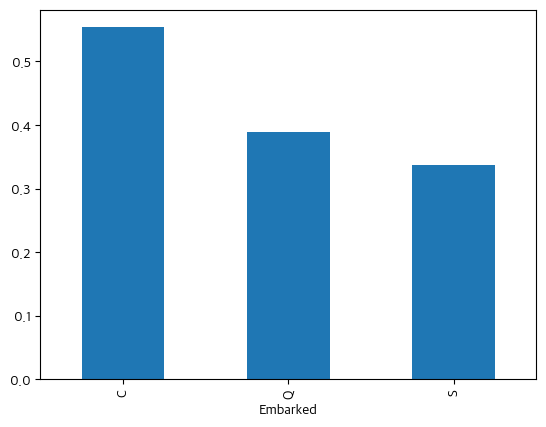

In [9]:
titanic.groupby(['Embarked',])['Survived'].mean().plot(kind='bar')

In [10]:
# C에서 탑승한 사람이 많음 1.C 2.Q 3.S

In [11]:
#생존률
titanic.groupby(['Parch',])['Survived'].mean()*100

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64

In [12]:
# 0 1 2 3 4 5 6 승객의 부모/자녀 수를 나타내며, 이 값에 해당하는 승객들의 생존률
# 부모/자녀 수가 0인 승객의 생존률은 약 34.4%이며
# 부모/자녀 수가 1인 승객의 생존률은 약 55.1%이다

<Axes: xlabel='Parch'>

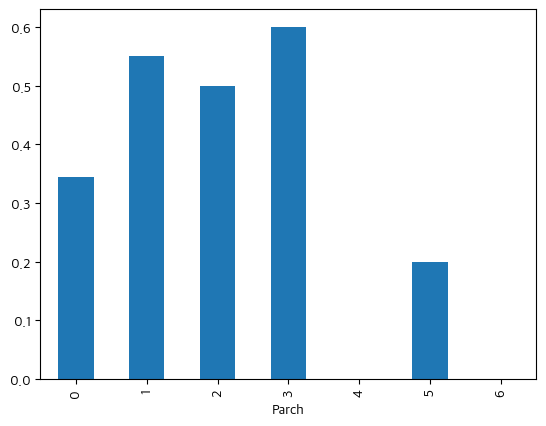

In [13]:
titanic.groupby(['Parch',])['Survived'].mean().plot(kind = 'bar')

In [14]:
#형제 자매 배우자 의 수 SibSp 
titanic.groupby(['SibSp',])['Survived'].mean()*100

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

<Axes: xlabel='SibSp'>

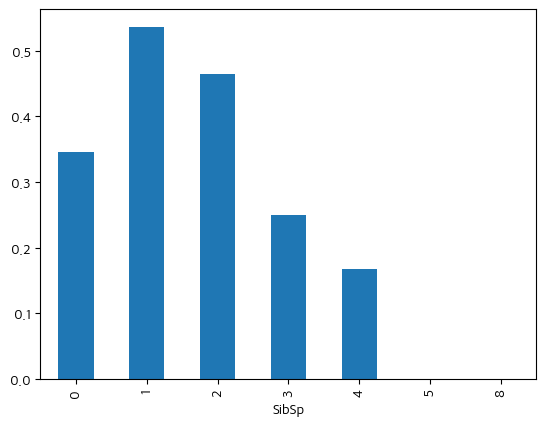

In [15]:
titanic.groupby(['SibSp',])['Survived'].mean().plot(kind='bar')

In [16]:
#티켓 클라스에 의한 생존율
titanic.groupby(['Pclass',])['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

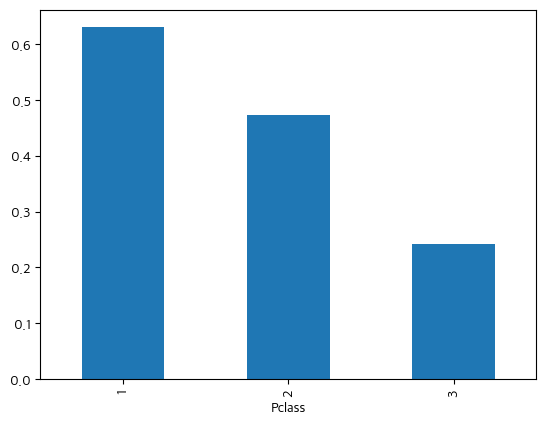

In [17]:
#1등석이 62% 2등석 47% 3등석 24%
titanic.groupby(['Pclass',])['Survived'].mean().plot(kind='bar')


In [18]:
#나이에 의한 생존율
for i in range(len(titanic)):
    if titanic[:]['Age'][i] >=80:
        print(i)
        
# 행을 순회하면서 해당 행의 Age열이 80 이상인 경우 출력

630


In [19]:
titanic['Age'] = pd.cut(titanic.Age, bins=[10, 20, 30, 40, 50, 60, 70, 80], labels=['10', '20', '30', '40', '50', '60', '70'])


In [20]:
titanic.groupby(['Age',])['Survived'].mean()*100

Age
10    38.260870
20    36.521739
30    44.516129
40    38.372093
50    40.476190
60    23.529412
70    20.000000
Name: Survived, dtype: float64

<Axes: xlabel='Age'>

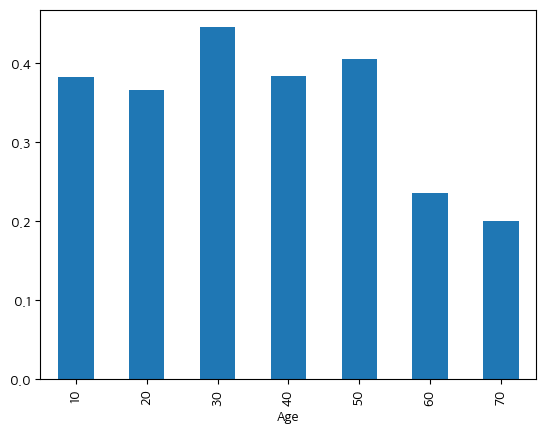

In [21]:
titanic.groupby(['Age',])['Survived'].mean().plot(kind='bar')

In [22]:
#요금
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
#count: 운임 정보를 제공하는 데이터의 수 (여기서는 891명의 승객 데이터가 제공됨)
#mean: 운임(Fare)의 평균값 (약 32.2 달러)
#std: 운임(Fare)의 표준편차 (약 49.7 달러)
#min: 운임(Fare)의 최솟값 (0 달러)
#25%: 운임(Fare)의 하위 25% 값 (7.91 달러)
#50%: 운임(Fare)의 중앙값 (14.45 달러)
#75%: 운임(Fare)의 상위 25% 값 (31 달러)
#max: 운임(Fare)의 최댓값 (512.33 달러)

In [24]:
titanic['Fare'] = pd.cut(titanic.Fare,bins=[0,8,14,31,512],labels=['0','1','2','3'])

In [25]:
# 'Fare' 값이 0 이상 8 이하인 데이터를 '0'으로,
#8 초과 14 이하인 데이터를 '1'로, 14 초과 31 이하인 데이터를 '2'로, 
#31 초과 512 이하인 데이터를 '3'으로 변환하여 'Fare' 열에 저장.
#이렇게 변환된 'Fare' 열은 0, 1, 2, 3의 4개의 값을 갖게 됨, 
#이를 통해 운임(Fare)이 생존 여부에 영향을 미치는지 확인 가능

In [26]:
titanic.groupby(['Fare',])['Survived'].mean()*100

Fare
0    22.566372
1    30.102041
2    43.965517
3    57.534247
Name: Survived, dtype: float64

<Axes: xlabel='Fare'>

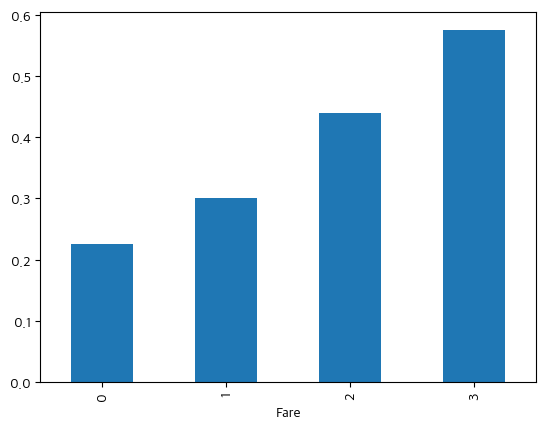

In [27]:
titanic.groupby(['Fare',])['Survived'].mean().plot(kind='bar')

In [28]:
#예측 모델 만들기

In [29]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,20,1,0,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30,1,0,3,C
2,1,3,"Heikkinen, Miss. Laina",female,20,0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30,1,0,3,S
4,0,3,"Allen, Mr. William Henry",male,30,0,0,1,S


In [30]:
survive.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [31]:
nothing.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [32]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         241
SibSp         0
Parch         0
Fare         18
Embarked      2
dtype: int64

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 데이터 불러오기
titanic = pd.read_csv('train.csv')

# 나이와 관련된 특성만 추출
age_df = titanic[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch']].copy()

# 성별을 숫자로 매핑 (여성: 0, 남성: 1)
age_df['Sex'] = age_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

# 나이가 null이 아닌 데이터와 null인 데이터를 분리
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values

# 나이가 null이 아닌 데이터에서, 나이와 다른 특성을 분리
X = known_age[:, 1:]
y = known_age[:, 0]

# RandomForestRegressor를 사용하여 모델 학습
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

# 학습된 모델을 사용하여 나이가 null인 데이터의 나이를 예측
predicted_ages = rfr.predict(unknown_age[:, 1:])

# 예측한 나이를 원래 데이터프레임에 채워넣기
titanic.loc[(titanic.Age.isnull()), 'Age'] = predicted_ages

# 이제 다른 코드를 계속 실행하면 됩니다.
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic['Age_group'] = pd.cut(titanic['Age'], bins=[0,10,20,30,40,50,60,70,80], labels=['0', '1', '2', '3','4','5','6','7'])
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3


In [34]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
Age_group        0
dtype: int64

In [35]:
titanic = titanic.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1)

In [36]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,3


In [37]:
titanic.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     2
Family       0
Age_group    0
dtype: int64

In [38]:
# Embarked 열의 최빈값 찾기
most_common_embarked = titanic['Embarked'].mode()[0]

# 결측값을 최빈값으로 대체
titanic['Embarked'] = titanic['Embarked'].fillna(most_common_embarked)

# 이후 코드들 (Sex, Embarked 변환 등)은 그대로 사용하면 됩니다.
titanic.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Family       0
Age_group    0
dtype: int64

In [40]:
import re

# 호칭 추출 함수 정의
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [41]:
#로지스틱회귀

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Name 열에서 호칭 추출
titanic['Title'] = titanic['Name'].apply(get_title)

# 호칭을 일반화 및 숫자로 매핑
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
titanic['Title'] = titanic['Title'].map(title_mapping)
titanic['Title'] = titanic['Title'].fillna(0)

# Name 열 삭제
titanic = titanic.drop(['Name'], axis=1)

# 범주형 변수를 숫자로 변환 (Sex, Embarked)
titanic['Sex'] = titanic['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)

# 특성과 레이블 분리
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train['Age_group'] = X_train['Age_group'].astype(int)
X_test['Age_group'] = X_test['Age_group'].astype(int)

# 로지스틱 회귀 모델 생성 및 학습
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 테스트 세트에서 예측
y_pred = logreg.predict(X_test)

# 정확도, 분류 보고서 및 혼동 행렬 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[87 18]
 [18 56]]


In [42]:
print(X_train.dtypes)
print(X_test.dtypes)


Pclass         int64
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked       int64
Family         int64
Age_group      int64
Title          int64
dtype: object
Pclass         int64
Sex            int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked       int64
Family         int64
Age_group      int64
Title          int64
dtype: object


In [43]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Age_group,Title
0,0,3,1,22.0,1,0,7.2500,2,1,2,1
1,1,1,0,38.0,1,0,71.2833,0,1,3,3
2,1,3,0,26.0,0,0,7.9250,2,0,2,2
3,1,1,0,35.0,1,0,53.1000,2,1,3,3
4,0,3,1,35.0,0,0,8.0500,2,0,3,1


In [107]:
# k-최근접 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

titanic_input=titanic[['Pclass','Sex','Fare','Embarked','Family','Age_group']].to_numpy()
titanic_target = titanic['Survived'].to_numpy()

train_input,test_input,train_target,test_target = train_test_split(titanic_input,titanic_target,random_state=42)

ss=StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8323353293413174
0.8116591928251121


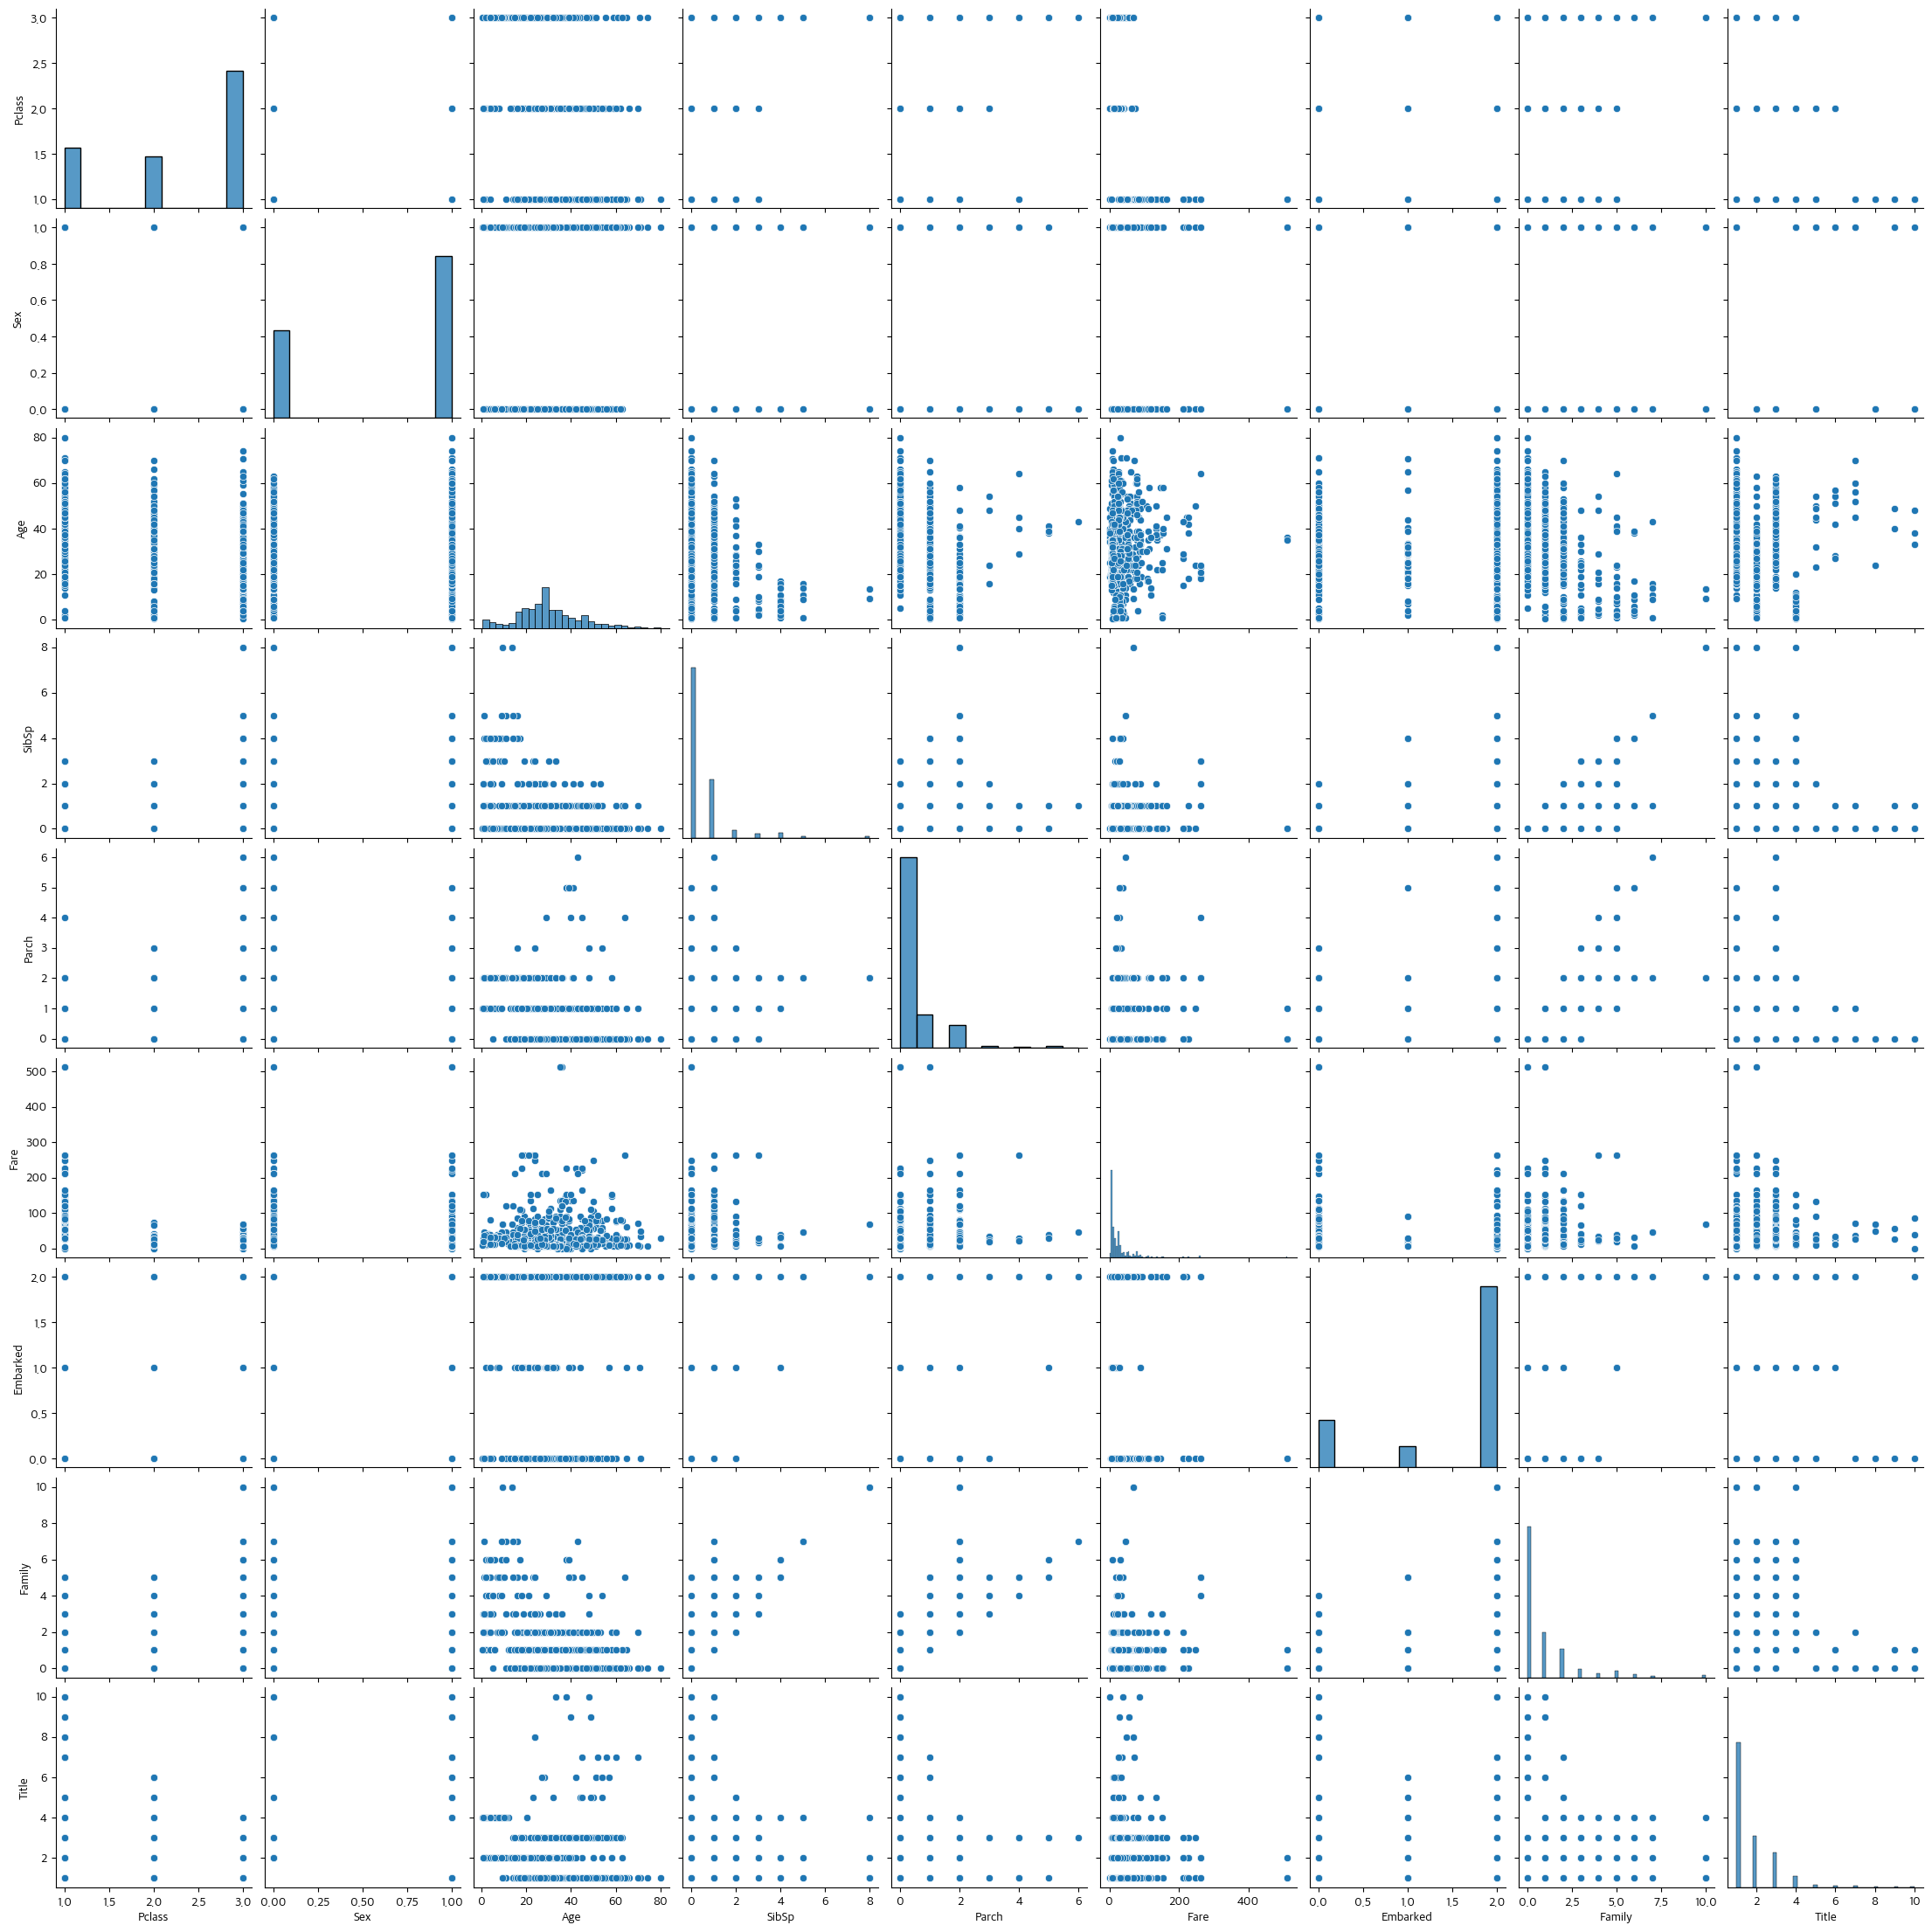

In [65]:
import seaborn as sns

titanic_input_df = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family', 'Age_group', 'Title']]
sns.pairplot(titanic_input_df)


In [86]:
#로지스틱 회귀
from sklearn.linear_model import LogisticRegression

# 특성과 레이블 분리
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_encoded = pd.get_dummies(X, columns=['Age_group'])

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8132022471910112
0.7988826815642458


In [112]:
#결정 트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10,random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled, test_target))

0.8697604790419161
0.8071748878923767


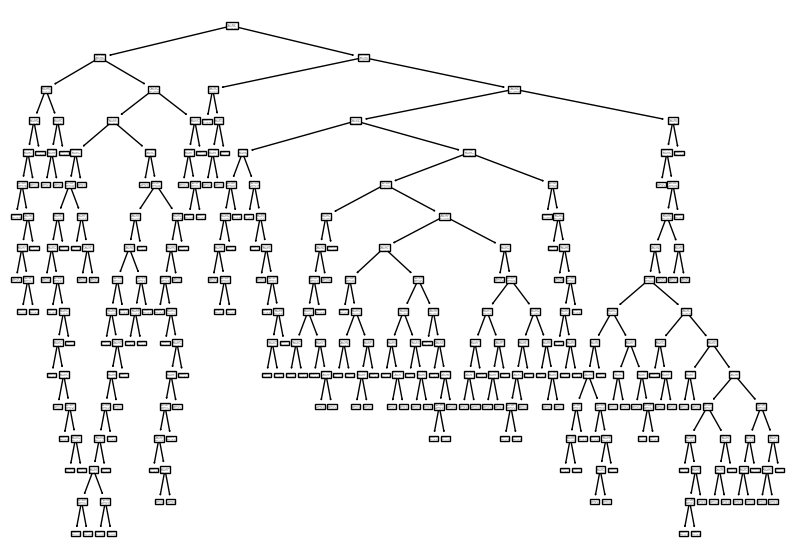

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 특성과 레이블 분리
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결정 트리 모델 생성
dt = DecisionTreeClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# 그리드 탐색을 사용하여 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터로 트리 학습
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# 테스트 세트에서 성능 평가
y_pred = best_dt.predict(X_test)
print("Train:", best_dt.score(X_train, y_train))
print("Test:",best_dt.score(X_test,y_test))


Train: 0.8820224719101124
Test: 0.8324022346368715
